===============================================================================================

Milestone 1


Nama : Kenneth Vincentius
Batch : Hck-007


Program ini dibuat untuk mengolah data set "Netflix Userbase Dataset" dan menganalisa dataset 

tersebut agar bisa mendapatakan informasi dari perhitungan statistic dan data visualisasi

==================================================================================================

link URL Tableau

Dashboard Tableau : https://public.tableau.com/app/profile/kenneth.vincentius/viz/Milestone1fix/DashboardNetflixUserDataset?publish=yes

Story Tableau : https://public.tableau.com/app/profile/kenneth.vincentius/viz/Milestone1fix/AnalisadanPerhitunganUserNetflixDataset?publish=yes


**Identifikasi Masalah**

Background : Saya adalah seorang data siencetist yang baru lulus dari hacktiv8 dan baru bekerja diperusahaan netflix. Terlepas dari semakin populernya Netflix dan basis pelanggannya yang besar, saya mendapatkan project dari team marketing untuk menganalisa dataset tentang subscriber netflix yang sudah ada bertujuan untuk membantu campaign marketing mereka menentukan bagaimana campaign marketing yang kedepannya harus dilakukan sevara efektif dan efisien untuk menaikkan jumlah subscriber netflix yang baru 

Penjabaran Masalah : 
1. Device apa yang paling sering digunakan untuk mengakses netflix ? 
2. Type subcriber apa yang paling banyak menghasilkan revenue ?
3. Negara mana yang paling banyak menghasilkan reveue
4. Gender apa yang paling banyak menggunakan netflix pada masing-masing negara
5. Menghitung durasi lamanya pengguna netflix
6. Berapa mean ,median ,modus, dan Skewness dari Umur ? (Statistic Desriptive)
7. Apakah ada hubungannya antara subcriber netflix dengan revenue bulanan (Statistic Inferensial)

Main Problem : kebutuhan akan kampanye pemasaran yang lebih efektif dan efisien untuk mendorong peningkatan pelanggan baru

Spesifik : meningkatkan jumlah subcriber netflix baru 

Measurable : meningkatkan jumlah subscriber netflix baru sebanyak 15%

Achievable : target kenaikan subscriber baru sebanyak 15% bisa dicapai

Relevant : target kenaikan subscriber baru sebanyak 15% bisa tercapai dikarenakan pengalihan dimana sudah banyak orang yang menonton beralih dari TV ke smartdevice mereka dan banyaknya variasi program di netflix 

Timebound : target kenaikan subcriber baru sebanyak 15% bisa tercapai dalam waktu 6 bulan

Problem Statement : Kebutuhan akan kampanye pemasaran yang lebih efektif dan efisien untuk mendorong peningkatan pelanggan baru sebesar 15% dalam waktu 6 bulan

**Data Loading**

In [1]:
#untuk memanggil module yang akan dipakai pada saat loading data dan mengolah data serta menvisualisasikan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#memanggil data csv ke dalam visual code studio
path='D:\Ken\git_pratice\milestone 1\\Netflix Userbase.csv'
df=pd.read_csv(path)
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


file csv sudah terload 

**Data Cleaning**

In [3]:
#mengecek apakah ada data yang kosong
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

ketika melakukan pengecekan apakah ada data yang kosong / missing value ternyata tidak ada

In [4]:
#mengecek apakah ada data yang terduplikasi 
df.duplicated().sum()

0

setelah melakukan pengecekan tidak ada data yang terduplikasi

In [5]:
#mengecek tipe data masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


ketika dicek untuk join date dan last payment date seharusnya memakai data datetime

In [6]:
#melakukan perubahan data join date dan last payment date menjadi datetime
df['Join Date'] = pd.to_datetime(df['Join Date'])  
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])  

ketika dipanggil tipe data untuk join date dan last payment date sudah berubah menjadi datetime

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


membuat kolom baru dimana subscription type diubah menjadi numerical dengan menambahkan kolom subscribeid dimana 1=basic, 2=standard, 3=premium

In [8]:
#membuat variable baru subs_type sebagai perwakilan subscription type
subs_type = df['Subscription Type']

In [9]:
#membuat fungsi unntuk mengubah subscription type dari basic menjadi 1, standard menjadi 2 , dan premium menjadi 3 lalu menampungnya ke dalam koom baru SubscribeID
def map_subscribe_type_to_id(subs_type):
    if subs_type == 'Basic':
        return 1
    elif subs_type == 'Standard':
        return 2
    elif subs_type == 'Premium':
        return 3
    else:
        return None  # Handle nilai yang tidak dikenali

# Menerapkan fungsi pada kolom SubscribeType untuk membuat kolom baru SubscribeID
df['SubscribeID'] = df['Subscription Type'].apply(map_subscribe_type_to_id)

kolom subscribe id sudah terbuat akan tetapi masih berada dipaling kanan sedangkan subscribeid ingin ditaru sebelum subscription type

In [10]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,SubscribeID
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,1
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,3
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,2
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,1
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month,3
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month,1
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month,2
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month,2


membuat reorder kolom baru dengan varibael baru dimana membuat varibale df_fix untuk menampung table yang kolomnya sudah di reorder

In [11]:
#membuat variabel baru unutk menampung nama kolom yang baru dan membuat varibael baru unutk menampung varibael yang telah dibuat 
df_new = ['User ID','SubscribeID','Subscription Type','Monthly Revenue','Join Date','Last Payment Date','Country','Age','Gender','Device','Plan Duration']
df_fix=df[df_new]

ketika dipanggil kembali maka kolom subscribeID sudah berada disebelum subscription type

In [12]:
df_fix

,User ID,SubscribeID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,3,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,2,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,1,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,3,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month
2496,2497,1,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,2,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,2,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month


menghilangkan kolom plan duration karena datanya semua hanya memiliki 1 value yaitu 1 bulan sehingga didrop untuk mempersimple table 

In [13]:
df_final = df_fix.drop(columns='Plan Duration')

menghilangkan kolom user id karena tidak penting dalam perhitungan analisis data stattistik

In [14]:
df_finals=df_final.drop(columns='User ID')

In [15]:
df_finals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SubscribeID        2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 175.9+ KB


ketika data dipanggil untuk kolom User ID dan Plan Duration sudah tidak ada

**Analisis dan perhitungan**

1. Device apa yang paling sering digunakan untuk mengakses netflix ? 

In [16]:
#membuat variabel baru untuk menampung value counts dari device
device_freq = df_final['Device'].value_counts()
device_freq

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64

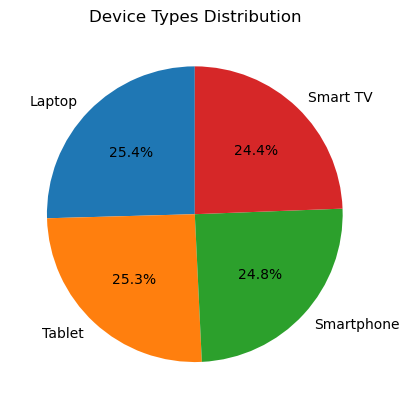

In [17]:
#menggunakan pie chart untuk menampilkan device mana yang sering dipakai
plt.pie(device_freq, labels=device_freq.index, autopct='%1.1f%%', startangle=90)
plt.title('Device Types Distribution')
plt.show()

Kesimpulan : Laptop memiliki pengguna paling banyak ketika menggunakan netflix diikuti oleh tablet,smartphone,dan smart tv jadi untuk meningkatkan subscriber baru untuk peningkatan UI dan user experience bisa dilakukan di semua devicenya untuk membuat user tetap menggunakan netflix dan menarik user baru

2. Type subcriber apa yang paling banyak menghasilkan revenue ?

Text(0, 0.5, 'Monthly Revenue')

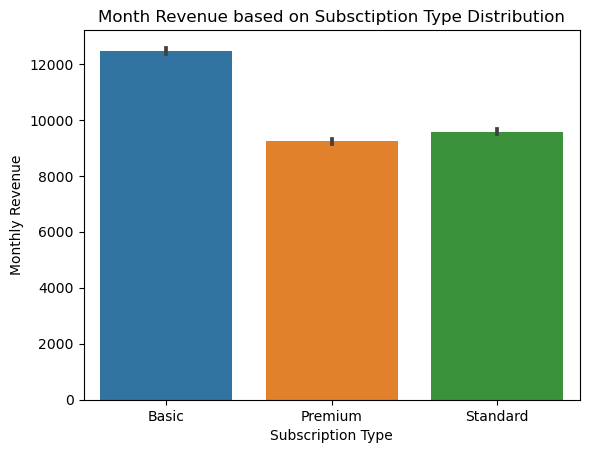

In [18]:
#menggunakan barplot untuk menampilkan perbandingan dari total revnue dari masing-masing tipe subscription
sns.barplot(x='Subscription Type', y='Monthly Revenue', estimator=sum, data=df_finals.sort_values('Monthly Revenue'))
plt.title('Month Revenue based on Subsctiption Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Monthly Revenue')

Kesimpulan : Dilihat dari data type basic menyumbang paling dari revenue walaupun dia merupakan type yang paling murah, sehingga type basic bisa ditingkatkan lagi dari UI dan user experiencenya agar menarik orang untuk daftar menjadi pengguna baru netflix dan mempertahankan user tetap

3. Negara mana yang paling banyak menghasilkan reveue

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Mexico'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'Australia')])

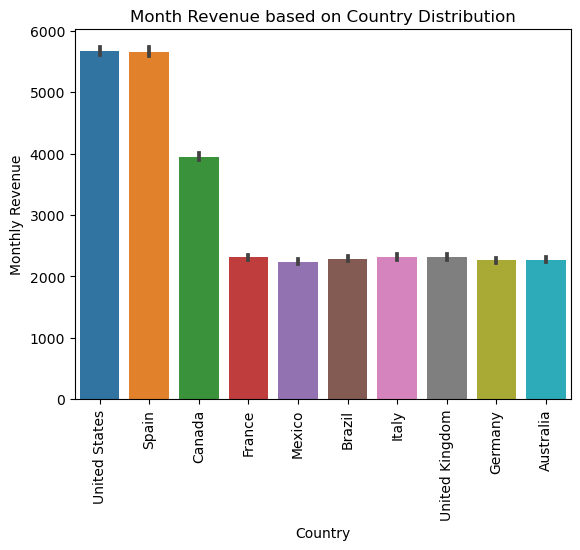

In [19]:
#memakai barplot untuk menampilkan total revnue pada masing-masing negara
sns.barplot(x='Country', y='Monthly Revenue', estimator='sum',data=df_finals.sort_values('Monthly Revenue'))
plt.title('Month Revenue based on Country Distribution')
plt.xlabel('Country')
plt.ylabel('Monthly Revenue')
plt.xticks(rotation=90)

Kesimpulan : Jika dilihat dari table diatas didapatkan bahwa negara Amerika dan Spanyol merupakan penghasil revenue bulanan paling tinggi sehingga marketing campaign bisa lebih difokuskan di 2 negara tersebut seperti memberikan privilage berupa bisa mendapatkan subtitle dan dubbing dengan bahasa negara tersebut terlebih dahulu atau ada serial netflix khusus untuk negara tersebut untuk menarik pengguna baru netflix dan mempertahankan user tetap

4. Gender apa yang paling banyak menggunakan netflix pada masing-masing negara

Text(0, 0.5, 'Count')

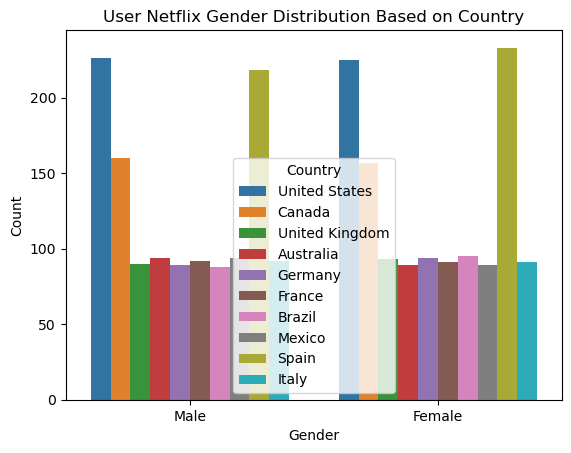

In [20]:
#menggunakan countplot untuk menghitung gender pengguna netflix pada masing-masing negara 
sns.countplot(x='Gender', hue='Country', data=df_finals)
plt.title('User Netflix Gender Distribution Based on Country')
plt.xlabel('Gender')
plt.ylabel('Count')

 Kesimpulan : Dilihat dari data bahwa ada beberapa negara dengan perbedaan pengguna netflix pria dan wanita seperti dinegara United State lebih banyak pengguna pria sehingga untuk nantinya alogritma film rekomendasi untuk user baru / existing user pria bisa ditingkatkan lebih lanjut , sedangkan Spanyol lebih banyak pengguna wanita sehingga untuk nantinya algoritma film rekomendasi untuk user baru / existing user wanita bisa ditingkatkan lebih lanjut untuk meningkatkan user experience. Hal tersebut juga berlaku untuk negara-negara yang lain

5. Menghitung durasi lamanya pengguna netflix

In [21]:
#membuat kolom subscribe duration untuk menampung durasi dari perhitungan last payment date - join date
df_finals['Subscribe Duration'] = df_finals['Last Payment Date'] - df_finals['Join Date']

In [22]:
df_finals['Subscribe Duration']=df_finals['Subscribe Duration'].astype('str').str.replace(' days','').astype('int')

In [23]:
df_finals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SubscribeID         2500 non-null   int64         
 1   Subscription Type   2500 non-null   object        
 2   Monthly Revenue     2500 non-null   int64         
 3   Join Date           2500 non-null   datetime64[ns]
 4   Last Payment Date   2500 non-null   datetime64[ns]
 5   Country             2500 non-null   object        
 6   Age                 2500 non-null   int64         
 7   Gender              2500 non-null   object        
 8   Device              2500 non-null   object        
 9   Subscribe Duration  2500 non-null   int32         
dtypes: datetime64[ns](2), int32(1), int64(3), object(4)
memory usage: 185.7+ KB


seteleh dicek kolom subcribe duration sudah terbuat

In [24]:
#melihat data yang sudaha da subsccribe duration
df_finals

,SubscribeID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Subscribe Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,629
1,3,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,774
2,2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,119
3,2,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,262
4,1,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,174
...,...,...,...,...,...,...,...,...,...,...
2495,3,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,500
2496,1,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,462
2497,2,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,310
2498,2,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,364


In [25]:
##membuat variabel baru unutk menampung nama kolom yang baru dan membuat varibael baru unutk menampung varibael yang telah dibuat 
df_finalss = ['SubscribeID','Subscription Type','Monthly Revenue','Join Date','Last Payment Date','Subscribe Duration','Country','Age','Gender','Device']
df_netflix=df_finals[df_finalss]

In [26]:
#memanggil data baru yang sudah dibetulkan posisisnya
df_netflix

,SubscribeID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Subscribe Duration,Country,Age,Gender,Device
0,1,Basic,10,2022-01-15,2023-10-06,629,United States,28,Male,Smartphone
1,3,Premium,15,2021-05-09,2023-06-22,774,Canada,35,Female,Tablet
2,2,Standard,12,2023-02-28,2023-06-27,119,United Kingdom,42,Male,Smart TV
3,2,Standard,12,2022-10-07,2023-06-26,262,Australia,51,Female,Laptop
4,1,Basic,10,2023-01-05,2023-06-28,174,Germany,33,Male,Smartphone
...,...,...,...,...,...,...,...,...,...,...
2495,3,Premium,14,2022-07-25,2023-12-07,500,Spain,28,Female,Smart TV
2496,1,Basic,15,2022-04-08,2023-07-14,462,Spain,33,Female,Smart TV
2497,2,Standard,12,2022-09-08,2023-07-15,310,United States,38,Male,Laptop
2498,2,Standard,13,2022-12-08,2023-12-07,364,Canada,48,Female,Tablet


In [27]:
df_netflix['Subscribe Duration'].min()

-159

Notes : Beberapa entry sudah melakukan pembayaran terlebih dahulu sebelum join

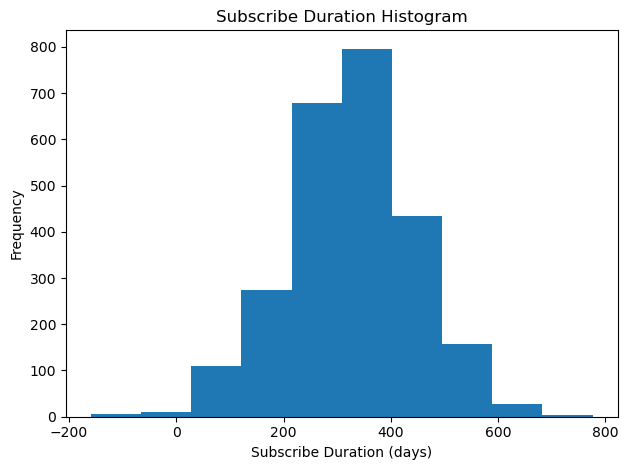

In [28]:
#menampilkan banyaknya orang yang telah menjadi pengguna netflix tetap berdasrakan durasi lamanya  
plt.hist(df_netflix['Subscribe Duration'])
plt.xlabel('Subscribe Duration (days)')
plt.ylabel('Frequency')
plt.title('Subscribe Duration Histogram')
plt.tight_layout()
plt.show()

Kesimpulan : Pengguna netflix sudah mensubcribe netflix selama 1 tahun dari join date cukup banyak sehingga bisa dikatakan mayoratis user menggunakan netflix untuk jangka waktu yang lama. Kita memberikan privilage pada user netflix yang sudah lebih dari 1 tahun menggunakan netflix bisa melihat episode terbaru 1 hari sebelum episode ditayangkan selama satu bulan dan jika ingin menikmati kembali layanan tersebut bisa memberikan referal 1 user baru sama dengan satu bulan fasilitas tersebut dan orang yang direferalkan akan mendapatkan fasilitas tersebut selama 1 bulan juga dan setelah 1 tahun bisa mendapatkan free fasilitas tersebut selama 1 bulan dan bisa memberikan referal user

6. Berapa mean ,median ,modus, dan Skewness dari Umur ? (Statistic Desriptive)

In [29]:
#menghitung mean , median , modus , dan skewness dari kolom umur
print('Age')
print('Rata-rata Umur Pengguna Netflix:',df_netflix['Age'].mean())
print('Median Umur Pengguna Netflix:',df_netflix['Age'].median())
print('Modus Umur Pengguna Netflix:',df_netflix['Age'].mode())
print(f"Skewness Harga Produk: {df_netflix['Age'].skew()}")

Age
Rata-rata Umur Pengguna Netflix: 38.7956
Median Umur Pengguna Netflix: 39.0
Modus Umur Pengguna Netflix: 0    30
1    39
Name: Age, dtype: int64
Skewness Harga Produk: 0.02877016977034411


Kesimpulan : Rata-rata umur pengguna netflix dikisaran 38.79 dengan memiliki median di umur 39 dan untuk modus memiliki nilai 30 dan 39 dimana mean, median, modus memiliki angka yang berdekatan semua. Dengan menggunakan skewness didapaykan nilai 0.028 mendekati 0 dan kurang dari 0.5 jadi bisa simpulkan bahwa data normal dan merupakan symmetrial distribution. Jika dilihat dari rata-rata umur 38 dan 39 bahwa diumur tersebut orang sudah bekerja / memiliki penghasilan jadi bisa menggunakan campaign dengan memberikan diskon untuk pengguna baru untuk subsribe netflix pada payday (tanggal 25-31) untuk menarik orang jadi pengguna baru netflix. 

7. Apakah ada hubungannya antara subcriber netflix dengan revenue bulanan

Menghitung hubungan antara subscriber type dan monthly revenue dari netflix

H0 = Tidak ada hubungan significant antara subscriber type dan monthly revenue dari netflix

H1 = Ada hubungan significant antara subscriber type dan monthly revenue dari netflix

Tingkat signifikansi = 0.05

Jika p-value <- 0.05, maka H0 ditolak

Jika p-value >0.05, maka H0 tidak dapat ditolak

Subscriber Type dilambangkan dengan SubscirberID pada saat menghitung pvalue dan kolerasi karena Subscriber Type merupakan kategorikal sehingga di ganti numerical dengan index

In [30]:
#menggunakan metode pearson untuk menghitung kolerasi dan p value dari subscribeid dan monthly revenue
corr_r, pval_p = stats.pearsonr(df_netflix['SubscribeID'], df_netflix['Monthly Revenue'])
print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")

r-correlation: 0.03, p-value: 0.21030916604401434


Kesimpulan : Dilihat dari nilai kolerasi 0.03 menandakan korelari positif dengan hubungan yang lemah antara subscriber type dengan monthly revenue , dari p value dengan nilai 0.21 lebih dari 0.05 menandakan bahwa h0 tidak dapat tolak jadi kesimpulannya adalah subscriber type dan month revenue memiliki hubungan kolerasi positif yang lemah dan tidak ada hubungan significant antara subsriver type dengan monthly revenue 

**Pengambilan Kesimpulan**

Marketing pemasaran untuk meningkat jumlah user baru netflix bisa 15% dalam 6 bulan bisa dicapai dengan meningkatkan UI dan user experience pada masing-masing device terutama type basic, meningkatkan algoritma rekomendasi film berdasarkan gender,memberikan privilage bisa menonton 1 hari lebih cepat episode baru baru user baru dan pemberi referal, memberikan promo saat periode gajian pada user baru, dan mendahulukan subtitle atau dubbing bahasa pada negara dengan pengguna netflix paling banyak untuk membuat orang menjadi user netflix baru dengan kampaye pemasaran yang sudah dijabarkan diatas.

In [31]:
#untuk mengimport table yang sudah final setelah dicleaning dan diolah ke bentuk csv untuk diproses di tablau
df_netflix.to_csv('Netflix Userbase Final.csv', index=False)